<a href="https://colab.research.google.com/github/abhinav112001-prg/SmokerStatusPredictionClassifier/blob/main/smokerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train_dataset.csv to train_dataset.csv


In [ ]:
import pandas as pd
import io

# Assuming you uploaded 'train_dataset.csv'
# Replace 'train_dataset.csv' with the actual name of your uploaded file
file_name = next(iter(uploaded)) # Gets the name of the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

display(df.head())

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
print(df.shape)
df.info()
df.isnull().sum()

(38984, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           389

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


In [ ]:
df.duplicated().sum()

np.int64(5517)

In [ ]:
df.drop_duplicates()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38978,40,170,65,77.0,1.5,1.5,1,1,110,62,...,79,91,16.1,1,0.9,28,43,36,1,1
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
print(df.columns.tolist())

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


In [ ]:
cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
        'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
        'AST', 'ALT', 'Gtp', 'dental caries']
target_col = ['smoking']


In [ ]:
print(df[cols].describe())

# for col in cols:
#     sb.histplot(df[col], kde=True)
#     plt.title(col)
#     plt.show()

#     sb.boxplot(x=df[col])
#     plt.title(col + " - Boxplot")
#     plt.show()

                age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean      44.127591    164.689488     65.938718     82.062115        1.014955   
std       12.063564      9.187507     12.896581      9.326798        0.498527   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38984.000000   38984.000000    38984.000000  38984.000000   
mean          1.008768       1.025369        1.026190    121.475631   
std           0.493813       0.157246        0.159703    

/tmp/ipython-input-1051348625.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking', data=df, palette='coolwarm')
/tmp/ipython-input-1051348625.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y='hemoglobin', data=df, palette='Set2')


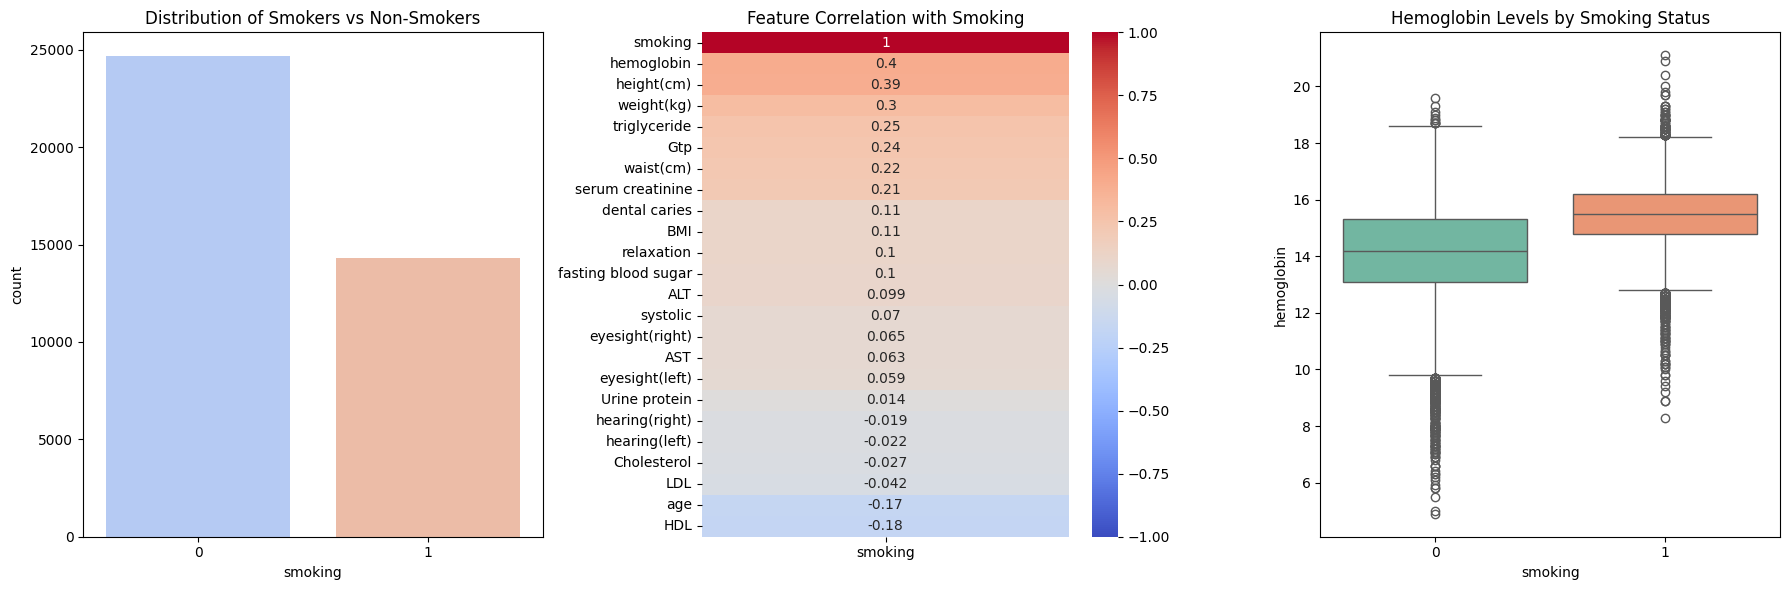

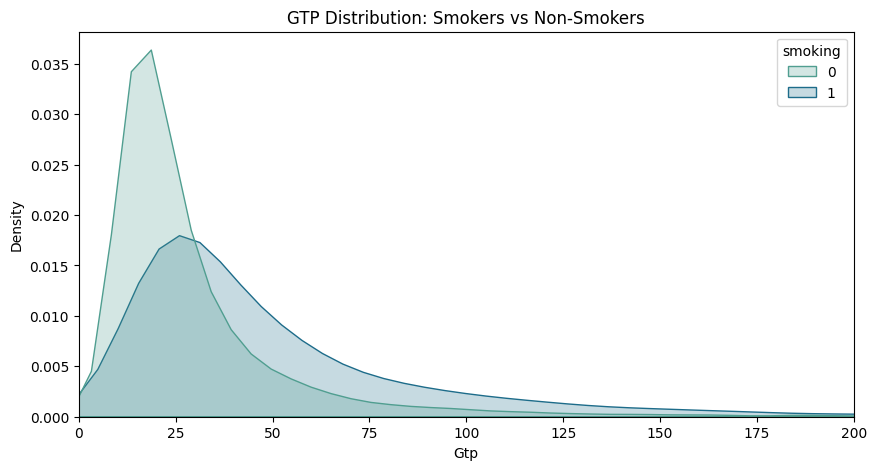

In [ ]:
# --------------------------------------------
# EDA (Exploratory Data Analysis)
# --------------------------------------------
import seaborn as sns
plt.figure(figsize=(18, 6))

# Plot 1: Target Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='smoking', data=df, palette='coolwarm')
plt.title('Distribution of Smokers vs Non-Smokers')

# Plot 2: Correlation Heatmap
plt.subplot(1, 3, 2)
# Select only numeric columns for correlation to avoid errors
corr = df.corr()
sns.heatmap(corr[['smoking']].sort_values(by='smoking', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Smoking')

# Plot 3: Key Feature Distributions by Target
# Hemoglobin and GTP are often higher in smokers
plt.subplot(1, 3, 3)
sns.boxplot(x='smoking', y='hemoglobin', data=df, palette='Set2')
plt.title('Hemoglobin Levels by Smoking Status')

plt.tight_layout()
plt.show()

# Extra visualization for GTP (often a strong indicator)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Gtp', hue='smoking', fill=True, common_norm=False, palette="crest")
plt.xlim(0, 200) # Limiting x-axis to see the distribution better (ignoring extreme outliers)
plt.title('GTP Distribution: Smokers vs Non-Smokers')
plt.show()

In [ ]:
# Improved Preprocessing for LR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
def final_preprocess(df):
    df_clean = df.copy()

    # 1. Clean Eyesight
    for col in ['eyesight(right)', 'eyesight(left)']:
        median_val = df_clean.loc[df_clean[col] != 9.9, col].median()
        df_clean[col] = np.where(df_clean[col] == 9.9, median_val, df_clean[col])

    # 2. Feature Engineering: BMI
    # Height is likely in cm, convert to meters
    df_clean['BMI'] = df_clean['weight(kg)'] / ((df_clean['height(cm)'] / 100) ** 2)

    # 3. Log Transform Skewed data
    skewed_features = ['triglyceride', 'serum creatinine', 'Gtp', 'ALT', 'AST']
    for col in skewed_features:
        df_clean[f'log_{col}'] = np.log1p(df_clean[col])
        df_clean.drop(columns=[col], inplace=True) # Drop originals to reduce noise

    # 4. Convert Binary
    df_clean['hearing(left)'] = df_clean['hearing(left)'].map({1: 0, 2: 1})
    df_clean['hearing(right)'] = df_clean['hearing(right)'].map({1: 0, 2: 1})

    return df_clean

df_final = final_preprocess(df)
X = df_final.drop(['smoking', 'id'], axis=1, errors='ignore')
y = df_final['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
# ---------------------------------------------------------
# LR (Logistic Regression)
# ---------------------------------------------------------
# solver='liblinear' is often good for binary datasets
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      7412
           1       0.60      0.79      0.68      4284

    accuracy                           0.73     11696
   macro avg       0.73      0.74      0.73     11696
weighted avg       0.76      0.73      0.74     11696

Accuracy: 0.7324726402188783


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# ---------------------------------------------------------
# For SVM and MLP (Neural Network)
# ---------------------------------------------------------
df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
X = df.drop('smoking', axis=1)
y = df['smoking']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling (CRITICAL for SVM and MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------
# Improved SVM with Hyperparameter Tuning
# ---------------------------------------------------------
print("\n--- Training SVM (This may take a few minutes) ---")

# Using RandomizedSearchCV to find better parameters faster than GridSearchCV
svm_param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Using a subset of data for tuning if dataset is very large to save time,
# but here we use full training set with n_iter=5 for speed.
svm = SVC(random_state=42)
svm_cv = RandomizedSearchCV(svm, svm_param_dist, cv=3, n_iter=5, verbose=2, n_jobs=-1, random_state=42)
svm_cv.fit(X_train_scaled, y_train)

print(f"Best SVM Params: {svm_cv.best_params_}")
y_pred_svm = svm_cv.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


# ---------------------------------------------------------
# Improved MLP (Neural Network)
# ---------------------------------------------------------
print("\n--- Training MLP Neural Network ---")

# Improved architecture: Deeper layers and Early Stopping
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32), # Deeper architecture
    activation='relu',
    solver='adam',
    alpha=0.0001,          # L2 Regularization
    batch_size='auto',
    learning_rate='adaptive', # Adapts learning rate if it gets stuck
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,   # Prevents overfitting
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))

# Comparison
print(f"\nFinal Comparison:")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"MLP Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")


--- Training SVM (This may take a few minutes) ---
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best SVM Params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
SVM Accuracy: 0.7584968577658073
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4933
           1       0.68      0.66      0.67      2864

    accuracy                           0.76      7797
   macro avg       0.74      0.74      0.74      7797
weighted avg       0.76      0.76      0.76      7797


--- Training MLP Neural Network ---
MLP Accuracy: 0.748108246761575
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      4933
           1       0.64      0.71      0.67      2864

    accuracy                           0.75      7797
   macro avg       0.73      0.74      0.73      7797
weighted avg       0.75      0.75      0.75      7797


Final Comparison:
SVM Accuracy: 0.7585
MLP Accuracy: 0.7481
